In [1]:
import numpy as np
import matplotlib.pyplot as plt

from optic.core import parameters
import scipy.constants as const

from optic.tx import simpleWDMTx

#from commpy.modulation import QAMModem

#from optic.dsp import pulseShape, firFilter, decimate, symbolSync
#from optic.models import phaseNoise, pdmCoherentReceiver, manakovSSF
#from optic.equalization import edc, mimoAdaptEqualizer
#from optic.carrierRecovery import cpr
#from optic.metrics import fastBERcalc, monteCarloGMI, monteCarloMI, signal_power
#from optic.plot import pconst

In [2]:
help(simpleWDMTx)

Help on function simpleWDMTx in module optic.tx:

simpleWDMTx(param)
    Simple WDM transmitter
    
    Generates a complex baseband waveform representing a WDM signal with
    arbitrary number of carriers
    
    :param.M: modulation order [default: 16]
    :param.constType: 'qam' or 'psk' [default: 'qam']
    :param.Rs: carrier baud rate [baud][default: 32e9]
    :param.SpS: samples per symbol [default: 16]
    :param.Nbits: total number of bits per carrier [default: 60000]
    :param.pulse: pulse shape ['nrz', 'rrc'][default: 'rrc']
    :param.Ntaps: number of coefficients of the rrc filter [default: 4096]
    :param.alphaRRC: rolloff do rrc filter [default: 0.01]
    :param.Pch_dBm: launched power per WDM channel [dBm][default:-3 dBm]
    :param.Nch: number of WDM channels [default: 5]
    :param.Fc: central frequency of the WDM spectrum [Hz][default: 193.1e12 Hz]
    :param.freqSpac: frequency spacing of the WDM grid [Hz][default: 40e9 Hz]
    :param.Nmodes: number of polarizati

In [3]:
# Parâmetros - Transmissor
paramTx = parameters()

paramTx.M   = 16           # Ordem do formato de modulação (QAM)
paramTx.constType = 'qam'  # Formato de modulação ('qam' ou 'psk')
paramTx.SpS = 16           # Número de amostras por símbolo
paramTx.Rs  = 90e9         # Taxa de sinalização [baud]

paramTx.Nbits = 400000     # Número total de bits por polarização

paramTx.pulse    = 'rrc'   # Tipo do filtro formatador de pulso
paramTx.Ntaps    = 1024    # Número de coeficientes do filtro
paramTx.alphaRRC = 0.01    # Rolloff do pulso RRC

paramTx.Pch_dBm  = 0       # Potência média por canal WDM [dBm]
paramTx.Nch      = 1       # Número de canais WDM
paramTx.freqSpac = 40.0e9  # Espaçamento WDM

paramTx.Fc     = 193.1e12  # Frequência central de operação
paramTx.Nmodes = 1         # Número de modos de polarização

print('Parâmetros do Transmissor')
print('- Formato de Modulação: {}-{}' .format(paramTx.M, paramTx.constType.upper()))
print('- Taxa de Sinalização: {} Gbaud' .format(paramTx.Rs*1e-9))
print('- Potência Média Enviada: {} dBm' .format(paramTx.Pch_dBm))
print('- Frequência de Operação: {} THz' .format(paramTx.Fc*1e-12))
print('- Número de polarizações do sinal: {}\n\n' .format(paramTx.Nmodes))

# generate WDM signal
sigWDM_Tx, symbTx_, paramTx = simpleWDMTx(paramTx)

Parâmetros do Transmissor
- Formato de Modulação: 16-QAM
- Taxa de Sinalização: 90.0 Gbaud
- Potência Média Enviada: 0 dBm
- Frequência de Operação: 193.1 THz
- Número de polarizações do sinal: 1


channel 0	 fc : 193.1000 THz
  mode #0	 power: 0.00 dBm
channel 0	 power: -0.00 dBm

total WDM signal power: -0.00 dBm


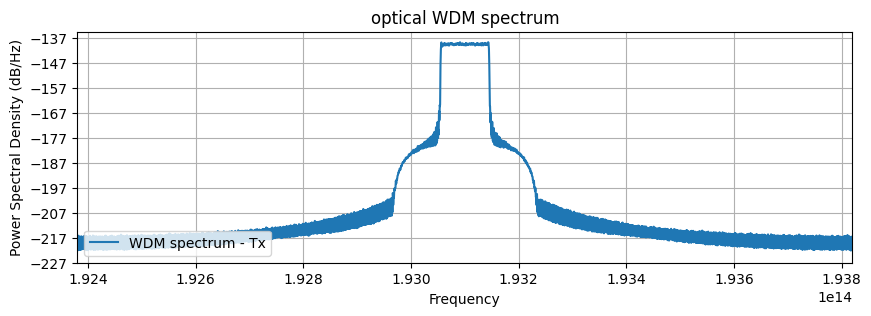

In [4]:
Fs = paramTx.Rs*paramTx.SpS # Taxa de amostragem

# plot psd
plt.figure(figsize=(10, 3))
plt.xlim(paramTx.Fc-Fs/2,paramTx.Fc+Fs/2);
plt.psd(sigWDM_Tx[:,0], Fs=Fs, Fc=paramTx.Fc, NFFT = 4*1024, sides='twosided', label = 'WDM spectrum - Tx')
plt.legend(loc='lower left')
plt.title('optical WDM spectrum');